In [ ]:
# prompt:  pd read csv spe ,

import pandas as pd

# Read the CSV file using pandas
df = pd.read_csv('/content/reviews.csv', sep=',')


In [ ]:
df

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,"ZM ""J""",1.0,I bought this Sandisk 16GB Class 10 to use wit...,2013-07-23,503,0,0,0,0,0.0,0.0
4911,4911,Zo,5.0,Used this for extending the capabilities of my...,2013-08-22,473,0,0,0,0,0.0,0.0
4912,4912,Z S Liske,5.0,Great card that is very fast and reliable. It ...,2014-03-31,252,0,0,0,0,0.0,0.0
4913,4913,Z Taylor,5.0,Good amount of space for the stuff I want to d...,2013-09-16,448,0,0,0,0,0.0,0.0


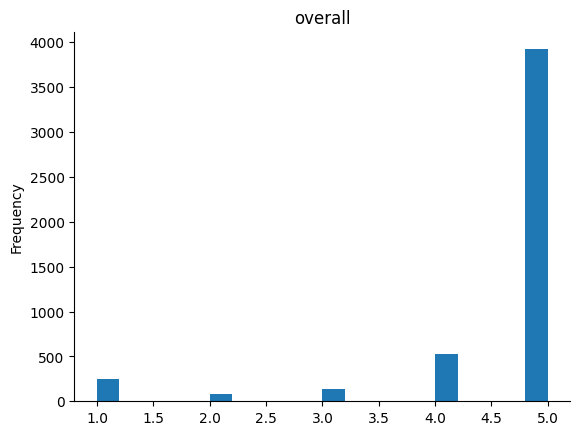

In [ ]:
# @title overall

from matplotlib import pyplot as plt
df['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Data Preprocessing
df = df[['reviewText', 'overall']].dropna()
df

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
...,...,...
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4911,Used this for extending the capabilities of my...,5.0
4912,Great card that is very fast and reliable. It ...,5.0
4913,Good amount of space for the stuff I want to d...,5.0


In [ ]:
card_rows = df[df['reviewText'].str.contains('card', case=False, na=False)]

In [ ]:
card_rows

,reviewText,overall
3,This think has worked out great.Had a diff. br...,5.0
4,"Bought it with Retail Packaging, arrived legit...",5.0
6,I have it in my phone and it never skips a bea...,5.0
7,It's hard to believe how affordable digital ha...,5.0
9,"in my galaxy s4, super fast card, and am total...",5.0
...,...,...
4907,MicroSD card works flawlessly with my digital ...,5.0
4908,"I really wanted a 128 GB card, but at less tha...",5.0
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4912,Great card that is very fast and reliable. It ...,5.0


from matplotlib import pyplot as plt
card_rows['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
card_rows['overall'].plot(kind='line', figsize=(8, 4), title='overall')
plt.gca().spines[['top', 'right']].set_visible(False)

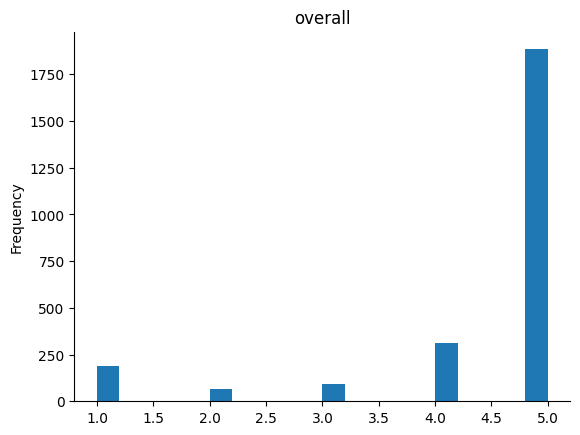

In [ ]:
from matplotlib import pyplot as plt
card_rows['overall'].plot(kind='hist', bins=20, title='overall')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_filtered = df[~(df['reviewText'].str.contains('card', case=False, na=False) & (df['overall'] == 5))]


In [ ]:
df_filtered

,reviewText,overall
0,No issues.,4.0
1,"Purchased this for my device, it worked as adv...",5.0
2,it works as expected. I should have sprung for...,4.0
5,It's mini storage. It doesn't do anything els...,5.0
8,Works in a HTC Rezound. Was running short of ...,5.0
...,...,...
4905,So far so good. I use this with my mobil phone...,5.0
4909,I bought this to stretch the capability of my ...,5.0
4910,I bought this Sandisk 16GB Class 10 to use wit...,1.0
4911,Used this for extending the capabilities of my...,5.0


In [ ]:
# prompt: remove stop words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# Remove stop words from the reviews
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [ ]:
X = df['reviewText'].copy()
y = df['reviewText'].copy()

In [ ]:
import spacy
import string
nlp = spacy.load("en_core_web_sm",disable=['parser','ner'])
stop = stopwords.words('english')
def cleanData(reviews):
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [apposV2[word] if word in apposV2 else word for word in words] #correct using apposV2 as mentioned above
        split = [appos[word] if word in appos else word for word in split] #correct using appos as mentioned above
        split = [word for word in split if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    df_cleaned = pd.DataFrame()
    df_cleaned['clean_reviews'] = all_
    return df_cleaned['clean_reviews']
X_cleaned = cleanData(X)
X_cleaned.head()

0                                                issue
1    purchase device work advertise never much phon...
2    work expect spring high capacity think make bi...
3    think work great diff bran card go south month...
4    buy retail packaging arrive legit orange envel...
Name: clean_reviews, dtype: object

In [ ]:
encoding = {1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           }
labels = ['1', '2', '3', '4', '5']

y = df['overall'].copy()
# y.replace(encoding, inplace=True)
# y = to_categorical(y,5)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report

In [ ]:
# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y, test_size=0.2, random_state=42)

# Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)



In [ ]:
import pickle

# Save the fitted vectorizer to a file
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

In [ ]:
# Model Training
logreg_model = LogisticRegression()
logreg_model.fit(X_train_tfidf, y_train)

# Model Evaluation
y_pred_logreg = logreg_model.predict(X_test_tfidf)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Added zero_division parameter to 1 to suppress warnings
classification_report_logreg = classification_report(y_test, y_pred_logreg, zero_division=1)

print(f'Logistic Regression Model Mean Squared Error: {mse_logreg}')
print(f'Logistic Regression Model Accuracy: {accuracy_logreg}')
print('Classification Report:\n', classification_report_logreg)

Logistic Regression Model Mean Squared Error: 0.8107833163784334
Logistic Regression Model Accuracy: 0.8168870803662258
Classification Report:
               precision    recall  f1-score   support

         1.0       0.64      0.32      0.42        44
         2.0       1.00      0.00      0.00        12
         3.0       1.00      0.03      0.06        30
         4.0       0.17      0.01      0.02       107
         5.0       0.82      1.00      0.90       790

    accuracy                           0.82       983
   macro avg       0.73      0.27      0.28       983
weighted avg       0.75      0.82      0.75       983



In [ ]:
import pickle

# Save LogisticRegression model
with open('logreg_model.pkl', 'wb') as file:
  pickle.dump(logreg_model, file)


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Combine regression and classification target
y_train_sentiment = y_train.apply(lambda x: 1 if x >= 4 else 0)
y_test_sentiment = y_test.apply(lambda x: 1 if x >= 4 else 0)

In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
# to ensure they have the same length did Pad sequences
max_length = 100
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post', truncating='post')

In [ ]:
# Model LSTM Neural Network
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=32, input_length=max_length))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model Compilation and Training
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_padded, y_train_sentiment, epochs=5, validation_data=(X_test_padded, y_test_sentiment))

Epoch 1/5
123/123 [==============================] - 21s 146ms/step - loss: 0.3432 - accuracy: 0.8962 - val_loss: 0.2936 - val_accuracy: 0.9125
Epoch 2/5
123/123 [==============================] - 10s 84ms/step - loss: 0.3072 - accuracy: 0.9059 - val_loss: 0.2957 - val_accuracy: 0.9125
Epoch 3/5
123/123 [==============================] - 10s 83ms/step - loss: 0.3029 - accuracy: 0.9102 - val_loss: 0.2861 - val_accuracy: 0.9145
Epoch 4/5
123/123 [==============================] - 8s 65ms/step - loss: 0.2984 - accuracy: 0.9125 - val_loss: 0.2909 - val_accuracy: 0.9135
Epoch 5/5
123/123 [==============================] - 7s 55ms/step - loss: 0.2951 - accuracy: 0.9117 - val_loss: 0.2850 - val_accuracy: 0.9166


In [ ]:
# Model Evaluation
threshold = 0.7  # normly 0.5
y_pred_lstm_prob = model.predict(X_test_padded)
y_pred_lstm = (y_pred_lstm_prob > threshold).astype(int)

31/31 [==============================] - 1s 15ms/step


In [ ]:
accuracy_lstm = accuracy_score(y_test_sentiment, y_pred_lstm)
classification_report_lstm = classification_report(y_test_sentiment, y_pred_lstm, zero_division=1)

print(f'LSTM Model Accuracy: {accuracy_lstm}')
print('Classification Report:\n', classification_report_lstm)

LSTM Model Accuracy: 0.9175991861648016
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.09      0.16        86
           1       0.92      1.00      0.96       897

    accuracy                           0.92       983
   macro avg       0.82      0.54      0.56       983
weighted avg       0.90      0.92      0.89       983



In [ ]:
review = "im happy to say its good"
clean_review = cleanData([review])[0]
tfidf_vector = tfidf_vectorizer.transform([clean_review])
sentiment_prediction = logreg_model.predict(tfidf_vector)[0]
sentiment_prediction

5.0

In [ ]:
review_tokens = tokenizer.texts_to_sequences(clean_review)

In [ ]:
max_length = 100
review_tokens_padded = pad_sequences(review_tokens, maxlen=max_length, padding='post', truncating='post')

In [ ]:
overall_prediction  = model.predict(review_tokens_padded)[0]

1/1 [==============================] - 0s 30ms/step


In [ ]:
t1 = (overall_prediction > 0.8).astype(int)

In [ ]:
# prompt: print this predictions

print("Sentiment Prediction:", sentiment_prediction)
print("Overall Prediction:", overall_prediction)


Sentiment Prediction: 5.0
Overall Prediction: [0.9361763]


In [ ]:
from keras.utils import to_categorical
pred_x = to_categorical(overall_prediction,5)

In [ ]:
pred_x[0]

array([1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
apposV2 = {
"are not" : "are not",
"ca" : "can",
"could n't" : "could not",
"did n't" : "did not",
"does n't" : "does not",
"do n't" : "do not",
"had n't" : "had not",
"has n't" : "has not",
"have n't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"is n't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"might n't" : "might not",
"must n't" : "must not",
"sha" : "shall",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"should n't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"were n't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"wo" : "will",
"would n't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"was n't": "was not",
"we'll":"we will",
"did n't": "did not"
}
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [ ]:
import spacy
import string
import pandas as pd

nlp = spacy.load("en_core_web_sm",disable=['parser','ner'])
stop = stopwords.words('english')
def cleanData(reviews):
    all_=[]
    for review in reviews:
        lower_case = review.lower() #lower case the text
        lower_case = lower_case.replace(" n't"," not") #correct n't as not
        lower_case = lower_case.replace("."," . ")
        lower_case = ' '.join(word.strip(string.punctuation) for word in lower_case.split()) #remove punctuation
        words = lower_case.split() #split into words
        words = [word for word in words if word.isalpha()] #remove numbers
        split = [apposV2[word] if word in apposV2 else word for word in words] #correct using apposV2 as mentioned above
        split = [appos[word] if word in appos else word for word in split] #correct using appos as mentioned above
        split = [word for word in split if word not in stop] #remove stop words
        reformed = " ".join(split) #join words back to the text
        doc = nlp(reformed)
        reformed = " ".join([token.lemma_ for token in doc]) #lemmatiztion
        all_.append(reformed)
    df_cleaned = pd.DataFrame()
    df_cleaned['clean_reviews'] = all_
    return df_cleaned['clean_reviews']

In [ ]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer

with open('tfidf_vectorizer.pkl', 'rb') as f:
    loaded_tfidf_vectorizer = pickle.load(f)


loaded_model = pickle.load(open('logreg_model.pkl', 'rb'))
new_review = "I really liked this product!"
clean_review = cleanData([new_review])[0]
new_review_tfidf = loaded_tfidf_vectorizer.transform([clean_review])
prediction = loaded_model.predict(new_review_tfidf)[0]
print(f"Predicted sentiment for '{new_review}': {prediction}")


Predicted sentiment for 'I really liked this product!': 5.0
